In [ ]:
!pip install scanpy anndata igraph leidenalg

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 4.7 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=bad3d916098916313ad0f807a1e41a78fc188135121226f9e9630b1783130968
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d

In [ ]:
import pandas as pd
import numpy as np
import scanpy as sc
import anndata
import igraph
import leidenalg
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
adata = sc.read_h5ad('/content/drive/MyDrive/anndata.h5ad')

In [ ]:
def BasicScanpyPreprocessing(adata, n_top_genes = 2000, n_neighbors=10, n_pcs = 40, random_state = 20):
  sc.pp.normalize_total(adata, target_sum = 1e4)
  sc.pp.log1p(adata)
  sc.pp.highly_variable_genes(adata, n_top_genes = n_top_genes, flavor = 'seurat')
  #sc.pp.scale(adata, max_value=10)
  sc.tl.pca(adata, svd_solver = 'arpack')
  sc.pp.neighbors(adata, n_neighbors = n_neighbors, n_pcs = n_pcs, random_state = random_state)
  sc.tl.umap(adata, random_state = random_state)
  sc.tl.tsne(adata, random_state = random_state)
  sc.tl.leiden(adata, random_state = random_state)
  return adata

In [ ]:
adata = BasicScanpyPreprocessing(adata)

/usr/local/lib/python3.10/dist-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
<ipython-input-4-0b290b09c639>:10: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, random_state = random_state)


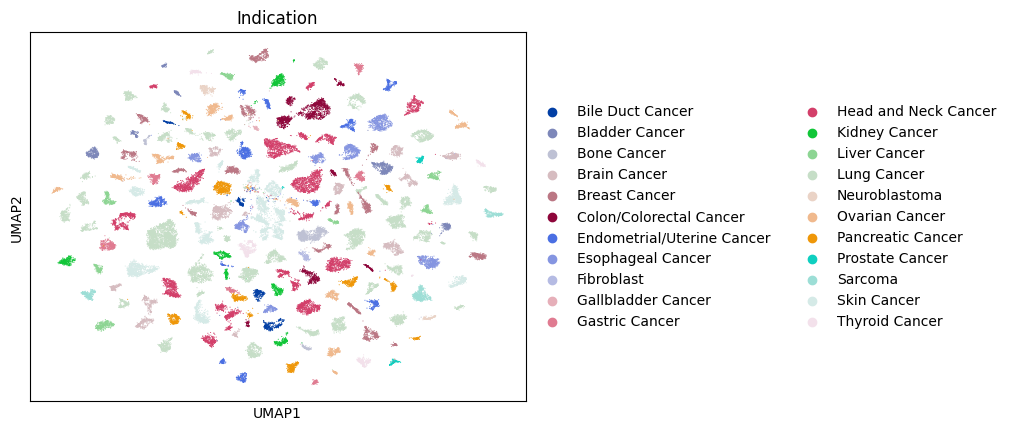

In [ ]:
sc.pl.umap(adata, color = ['Indication'])

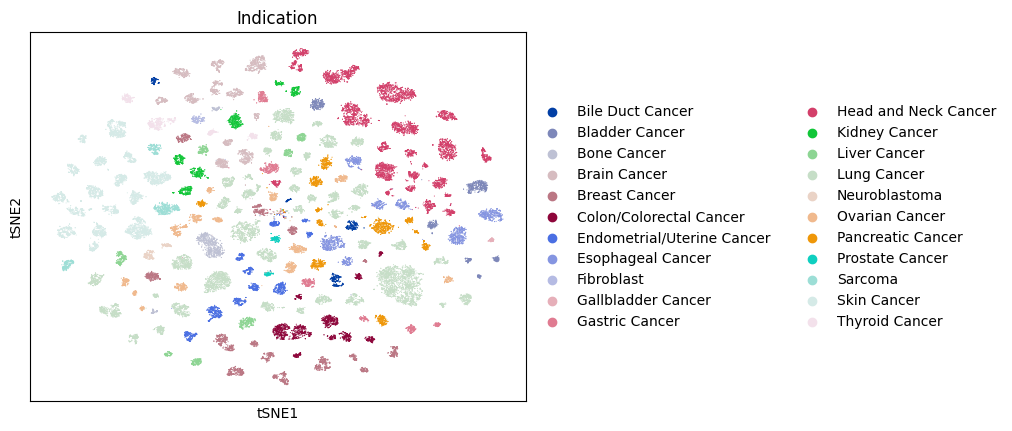

In [ ]:
sc.pl.tsne(adata, color = ['Indication'])

In [ ]:
adata.layers['counts'] = adata.X.copy()
adata.layers['log2_counts'] = scipy.sparse.csr_matrix(np.log2(adata.layers['counts'].toarray()+1))

In [ ]:
def ExploreCellLines(gene, indication = 'Indication'):
  if(indication != 'Indication'):
    adata_indication = adata[adata.obs.Indication==indication].copy()
    df = sc.get.obs_df(adata_indication, keys = ['ERBB2', 'VEGFA', 'VEGFB'], layer = 'log2_counts')
    df['CellLine'] = adata_indication.obs['CellLine']
    sns.boxplot(data = df, x = 'CellLine', y = gene, hue = 'CellLine', showfliers = False)
    sns.stripplot(data = df, x = 'CellLine', y = gene, color = 'black', size = 1, jitter = True)
    plt.xticks(rotation = 90)
  else:
    df = sc.get.obs_df(adata, keys = ['ERBB2', 'VEGFA', 'VEGFB'], layer = 'log2_counts')
    df['Indication'] = adata.obs['Indication']
    sns.boxplot(data = df, x = 'Indication', y = gene, hue = 'Indication', showfliers = False)
    sns.stripplot(data = df, x = 'Indication', y = gene, color = 'black', size = 0.5, jitter = True)
    plt.xticks(rotation = 90)

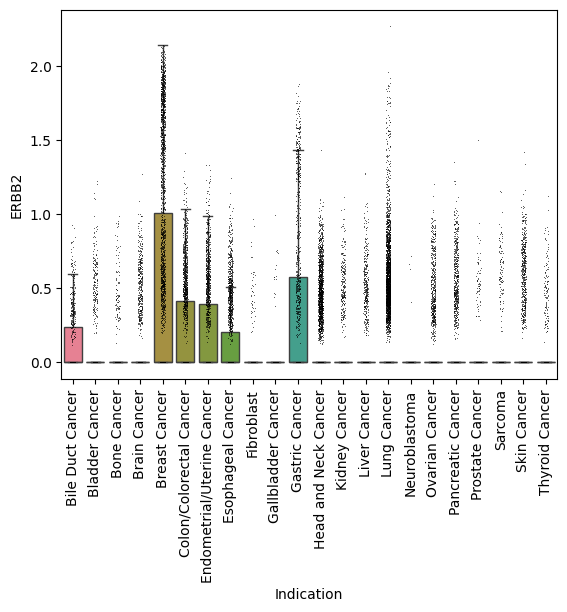

In [ ]:
ExploreCellLines('ERBB2')

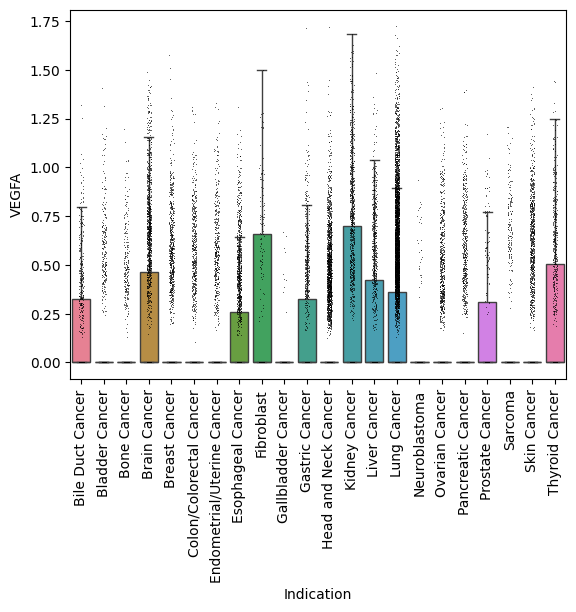

In [ ]:
ExploreCellLines('VEGFA')

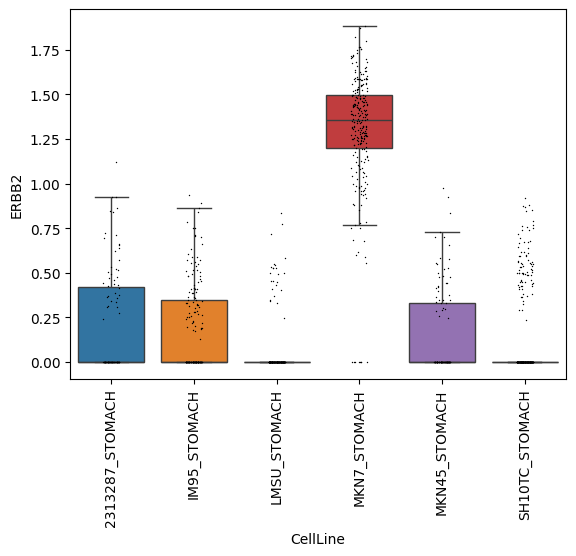

In [ ]:
ExploreCellLines('ERBB2', 'Gastric Cancer')

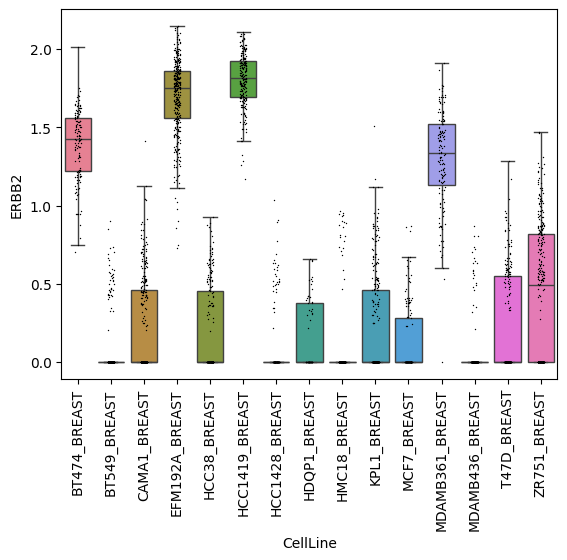

In [ ]:
ExploreCellLines('ERBB2', 'Breast Cancer')

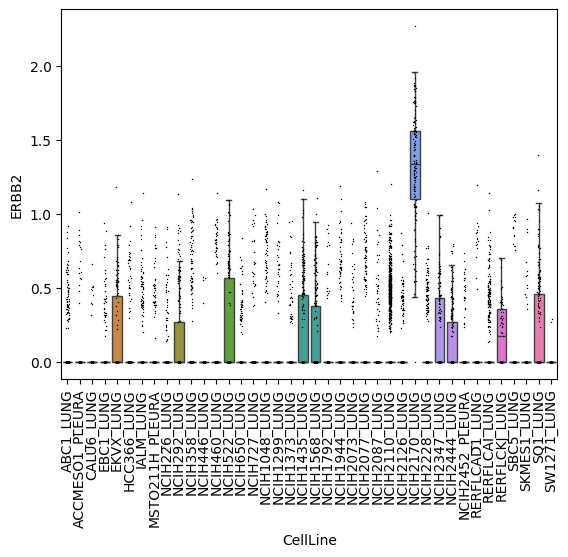

In [ ]:
ExploreCellLines('ERBB2', 'Lung Cancer')

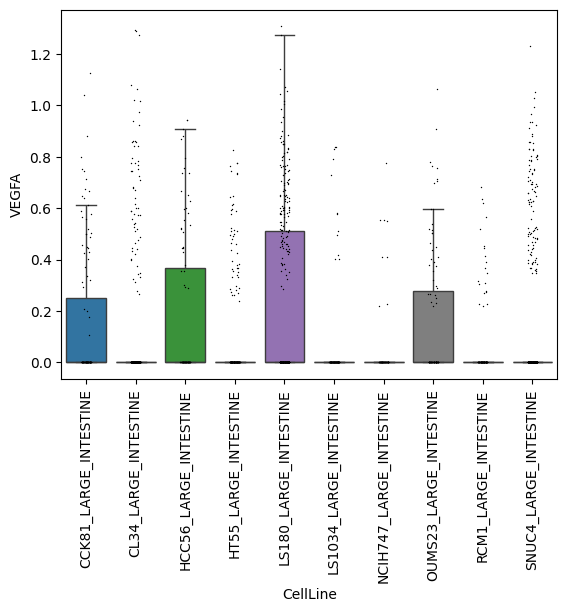

In [ ]:
ExploreCellLines('VEGFA', 'Colon/Colorectal Cancer')

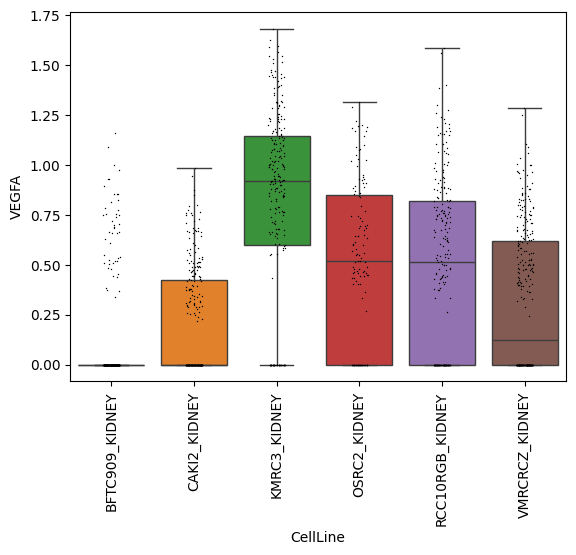

In [ ]:
ExploreCellLines('VEGFA', 'Kidney Cancer')

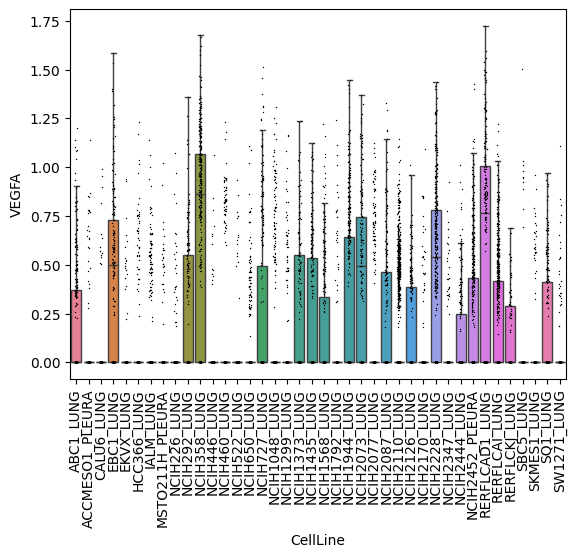

In [ ]:
ExploreCellLines('VEGFA', 'Lung Cancer')

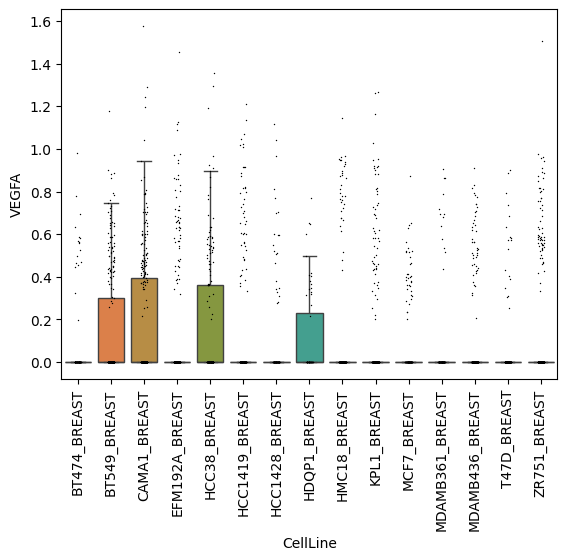

In [ ]:
ExploreCellLines('VEGFA', 'Breast Cancer')

In [ ]:
adata.obs.head()

CellLine Pool      Indication  Genes_expressed  \
AAACCTGAGACATAAC-1-18  NCIH2126_LUNG   18     Lung Cancer             4318   
AAACCTGCACAACGCC-1-18  SW579_THYROID   18  Thyroid Cancer             5021   
AAACCTGCAGACAAGC-1-18       C32_SKIN   18     Skin Cancer             3047   
AAACCTGCAGCTCGAC-1-18  SW579_THYROID   18  Thyroid Cancer             2765   
AAACCTGCATGGATGG-1-18   NCIH446_LUNG   18     Lung Cancer             2064   

                      Discrete_cluster_minpts5_eps1.8  \
AAACCTGAGACATAAC-1-18                             nan   
AAACCTGCACAACGCC-1-18                             nan   
AAACCTGCAGACAAGC-1-18                             nan   
AAACCTGCAGCTCGAC-1-18                             nan   
AAACCTGCATGGATGG-1-18                             nan   

                      Discrete_cluster_minpts5_eps1.5  \
AAACCTGAGACATAAC-1-18                             nan   
AAACCTGCACAACGCC-1-18                             nan   
AAACCTGCAGACAAGC-1-18                             nan   
AAACCTGCAGCTCGAC-1-18                             nan   
AAACCTGCATGGATGG-1-18                             nan   

                      Discrete_cluster_minpts5_eps1.2 CNA_subclone  \
AAACCTGAGACATAAC-1-18                             nan          nan   
AAACCTGCACAACGCC-1-18                 SW579_THYROID_1          nan   
AAACCTGCAGACAAGC-1-18                             nan          nan   
AAACCTGCAGCTCGAC-1-18                 SW579_THYROID_1          nan   
AAACCTGCATGGATGG-1-18                             nan          nan   

                       SkinPig_score  EMTI_score  ...  IFNResp_score  \
AAACCTGAGACATAAC-1-18          0.166      -0.045  ...          0.130   
AAACCTGCACAACGCC-1-18         -0.056       0.776  ...         -0.266   
AAACCTGCAGACAAGC-1-18          1.092       0.617  ...          0.318   
AAACCTGCAGCTCGAC-1-18         -0.601       1.038  ...          0.341   
AAACCTGCATGGATGG-1-18         -0.251      -0.325  ...         -0.044   

                       p53Sen_score  EpiSen_score  StressResp_score  \
AAACCTGAGACATAAC-1-18         0.619         1.869            -0.004   
AAACCTGCACAACGCC-1-18        -0.334        -1.125            -0.039   
AAACCTGCAGACAAGC-1-18         0.570        -0.165             0.074   
AAACCTGCAGCTCGAC-1-18        -0.253        -0.552             0.921   
AAACCTGCATGGATGG-1-18        -1.256        -0.367            -0.317   

                       ProtMatu_score  ProtDegra_score  G1/S_score  \
AAACCTGAGACATAAC-1-18           0.805            0.896       0.424   
AAACCTGCACAACGCC-1-18          -0.243           -0.642      -0.173   
AAACCTGCAGACAAGC-1-18           0.250            0.096      -0.367   
AAACCTGCAGCTCGAC-1-18           2.876            1.645       0.226   
AAACCTGCATGGATGG-1-18           0.790            1.925       0.138   

                       G2/M_score  n_genes  leiden  
AAACCTGAGACATAAC-1-18      -1.125     4323      47  
AAACCTGCACAACGCC-1-18       1.365     5034     114  
AAACCTGCAGACAAGC-1-18      -1.135     3055      14  
AAACCTGCAGCTCGAC-1-18       0.469     2769     114  
AAACCTGCATGGATGG-1-18      -0.384     2065     127  

[5 rows x 22 columns]

In [ ]:
adata_indication = adata[adata.obs.Indication=='Lung Cancer'].copy()
df_cell_line = sc.get.obs_df(adata_indication, keys = ['ERBB2', 'VEGFA', 'VEGFB'], layer = 'log2_counts')
df_cell_line['CellLine'] = adata_indication.obs['CellLine']
df_cell_line.head()

ERBB2     VEGFA     VEGFB         CellLine
AAACCTGAGACATAAC-1-18  0.000000  0.381903  0.618537    NCIH2126_LUNG
AAACCTGCATGGATGG-1-18  0.000000  0.000000  0.000000     NCIH446_LUNG
AAACGGGGTTTAGGAA-1-18  0.000000  0.000000  0.000000  NCIH2452_PLEURA
AAAGATGGTGCGGTAA-1-18  0.687221  0.000000  0.000000  NCIH2452_PLEURA
AAATGCCGTCACCTAA-1-18  0.000000  0.000000  0.000000     NCIH446_LUNG

In [ ]:
df_indication = sc.get.obs_df(adata, keys = ['ERBB2', 'VEGFA', 'VEGFB'], layer = 'log2_counts')
df_indication['Indication'] = adata.obs['Indication']
df_indication.head()

ERBB2     VEGFA     VEGFB      Indication
AAACCTGAGACATAAC-1-18    0.0  0.381903  0.618537     Lung Cancer
AAACCTGCACAACGCC-1-18    0.0  0.664748  0.000000  Thyroid Cancer
AAACCTGCAGACAAGC-1-18    0.0  0.000000  0.000000     Skin Cancer
AAACCTGCAGCTCGAC-1-18    0.0  0.906552  0.000000  Thyroid Cancer
AAACCTGCATGGATGG-1-18    0.0  0.000000  0.000000     Lung Cancer

/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:437: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:440: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

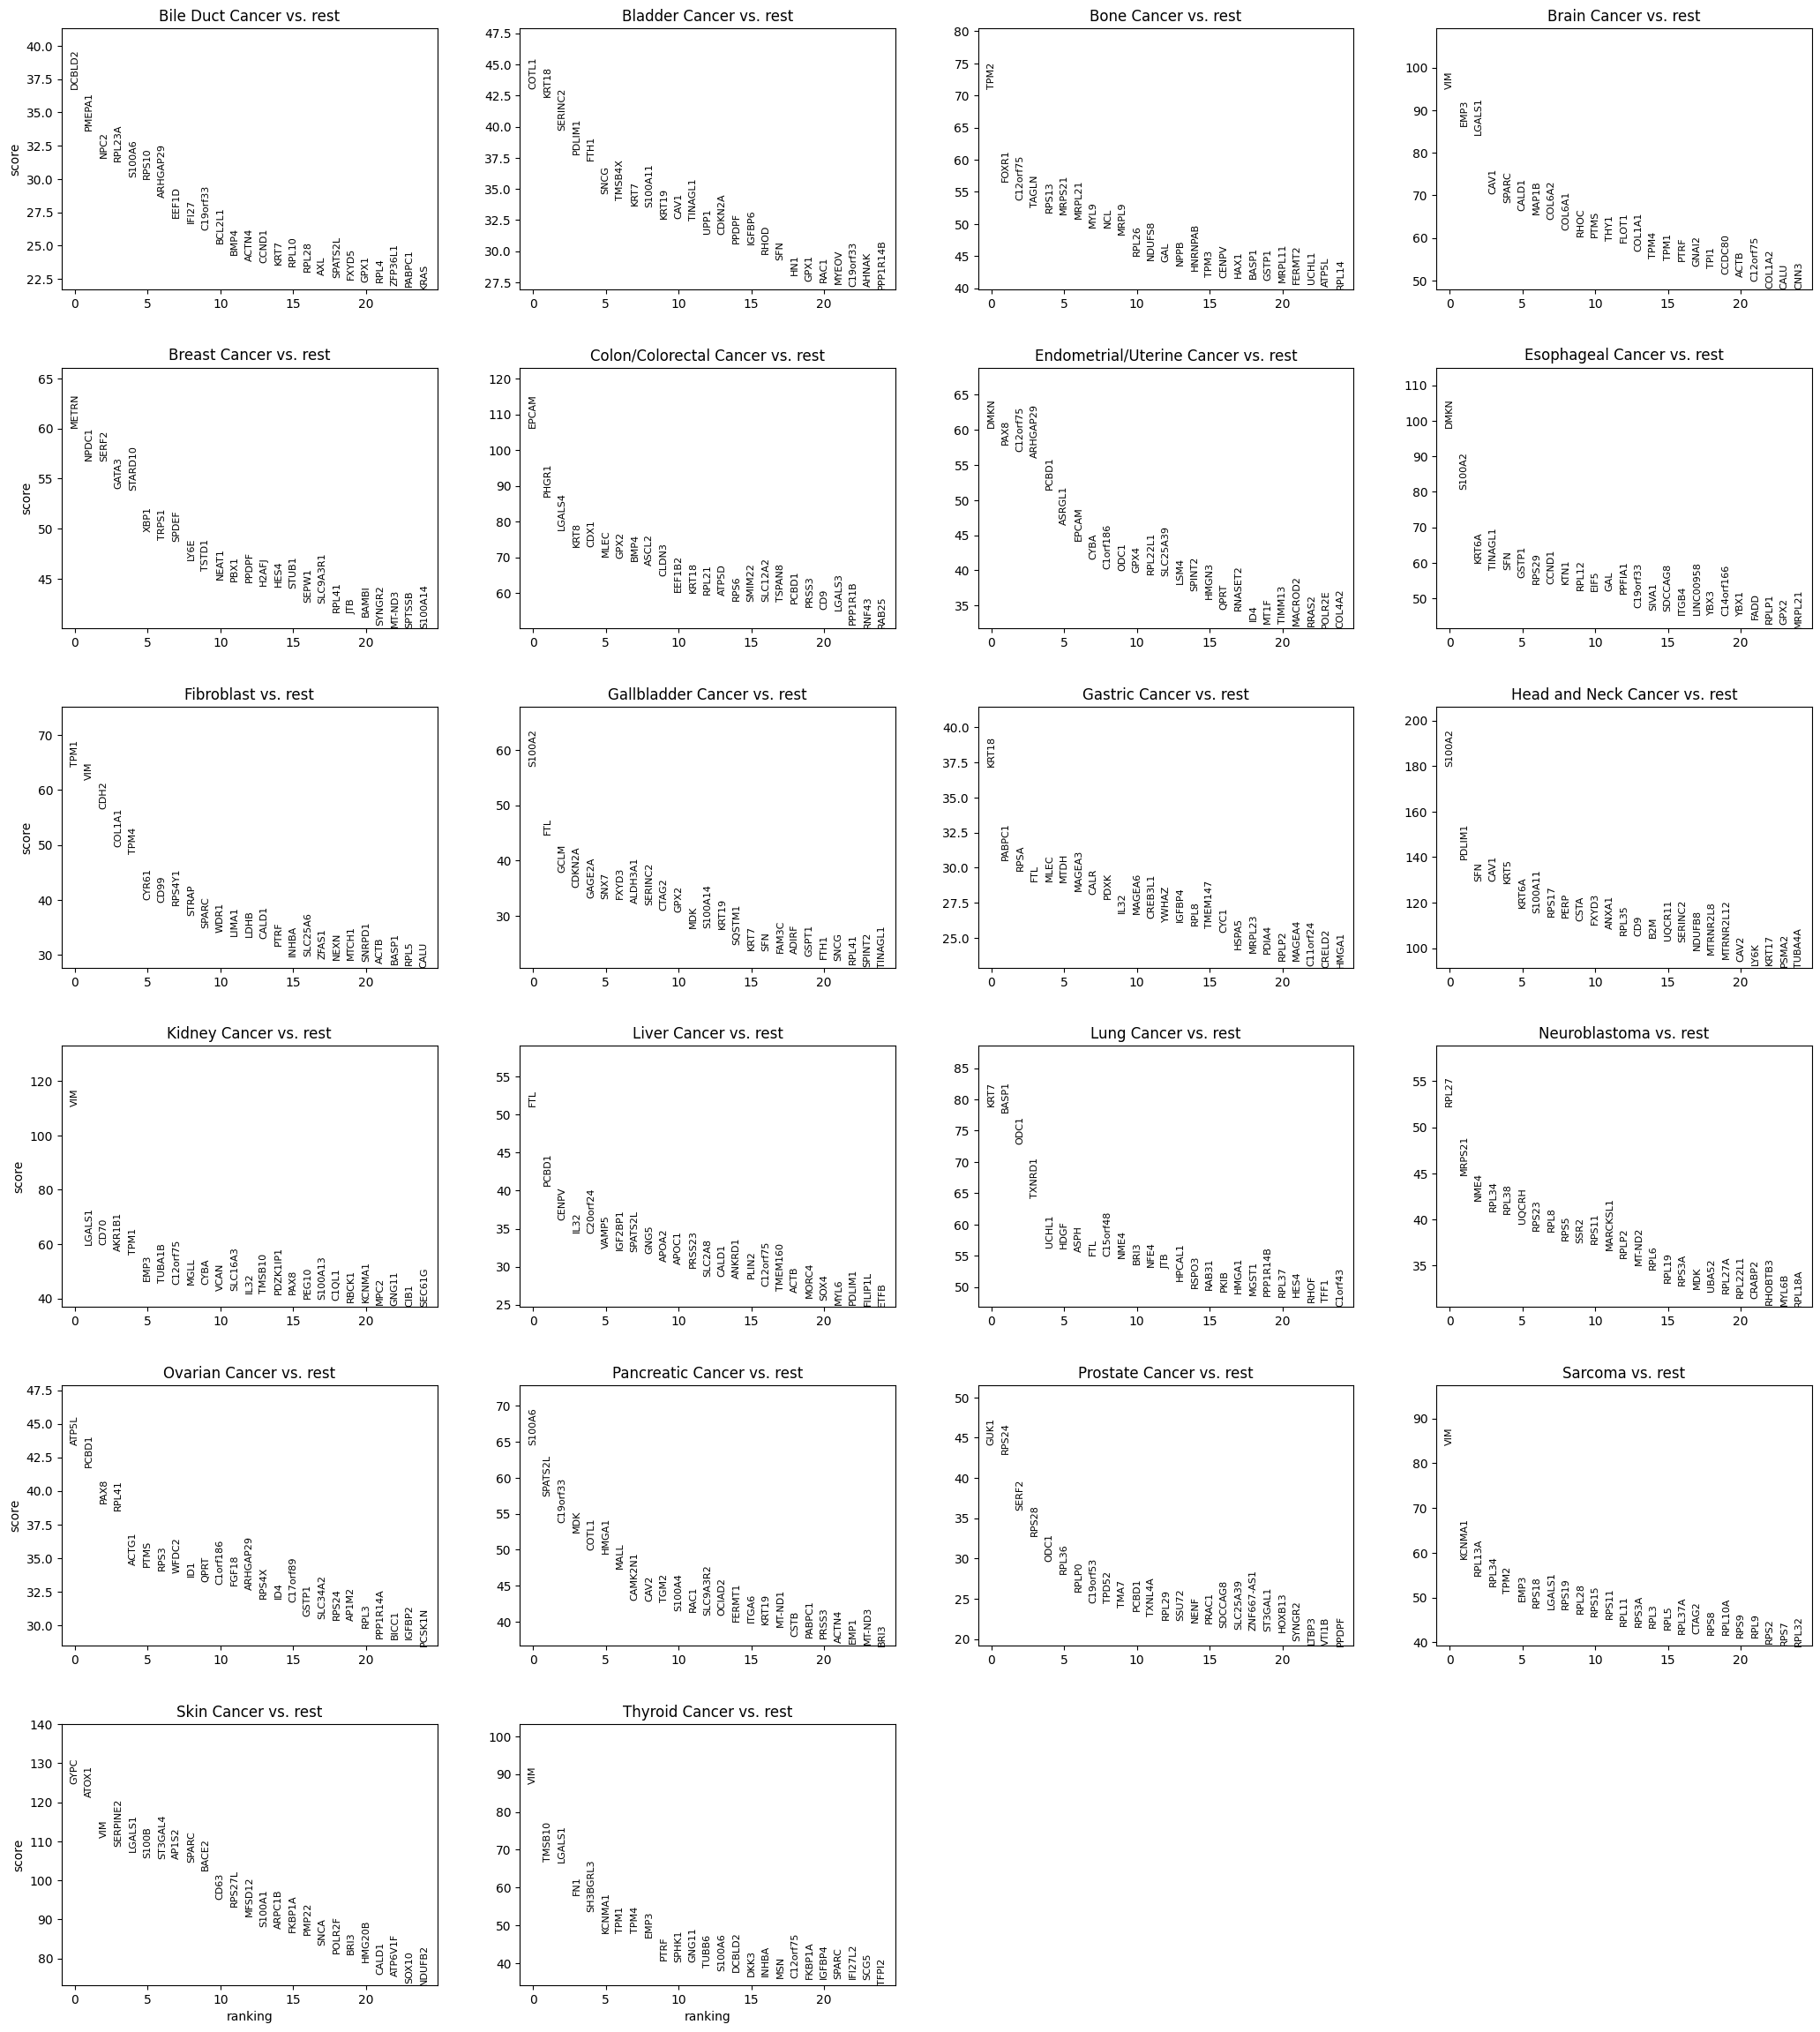

In [46]:
# Differential expression analysis
sc.tl.rank_genes_groups(adata, groupby = 'Indication', method = 't-test', key_added = 't_test')
sc.pl.rank_genes_groups(adata, groupby = 'Indication', n_genes = 25, sharey = False, key = 't_test')

/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:437: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:440: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

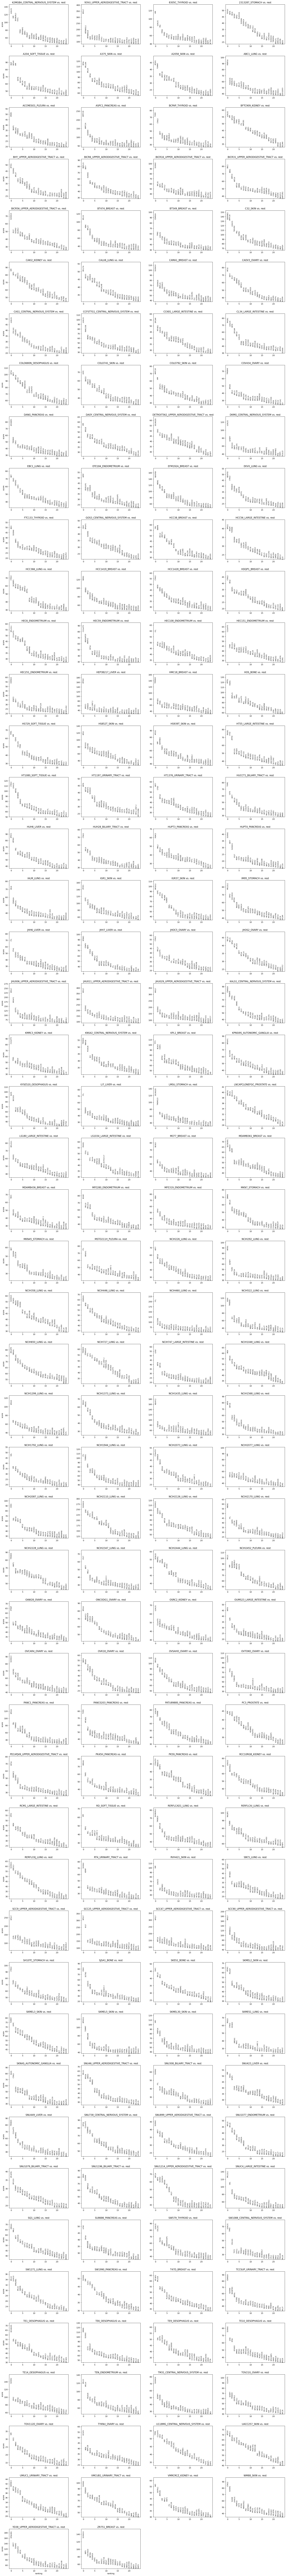

In [47]:
sc.tl.rank_genes_groups(adata, groupby = 'CellLine', method = 't-test', key_added = 't_test')
sc.pl.rank_genes_groups(adata, groupby = 'CellLine', n_genes = 25, sharey = False, key = 't_test')